# Census Income Project

In [2]:
# Importing all the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
census_proj = pd.read_csv("census_income.csv")

In [5]:
census_proj

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
census_proj.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
census_proj.shape

(32560, 15)

Total number of Rows = 32560 and Columns = 15

In [8]:
census_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
census_proj.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

From the above case, it is clear that there are no null values

Checking the unique values ---

In [12]:
for i in census_proj.columns:
    print(census_proj[i].unique())

[50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 83311 215646 234721 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' P

If we closely observe in the above case, the dataset contains a question mark "?" that needs to be replaced

In [14]:
census_proj = census_proj.replace("?",np.NaN)

In [17]:
census_proj.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In the above case, no null values are present

In [20]:
census_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
a_cols=[]

for i in census_proj.columns:
    if census_proj[i].dtypes == "object":
        a_cols.append(i)

# Visualization ---

# Countplot ---

In [22]:
a_cols

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

<AxesSubplot:xlabel='Workclass', ylabel='count'>

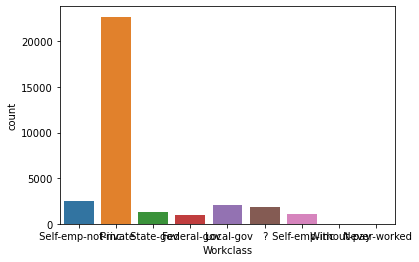

In [24]:
sns.countplot(census_proj.Workclass)

<AxesSubplot:xlabel='Education', ylabel='count'>

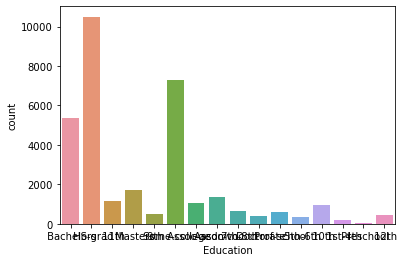

In [25]:
sns.countplot(census_proj.Education)

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

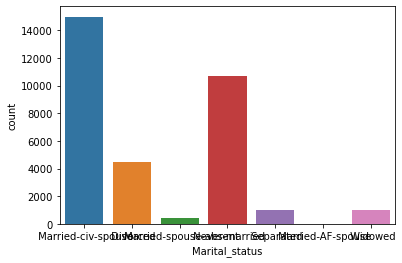

In [27]:
sns.countplot(census_proj.Marital_status)

<AxesSubplot:xlabel='Occupation', ylabel='count'>

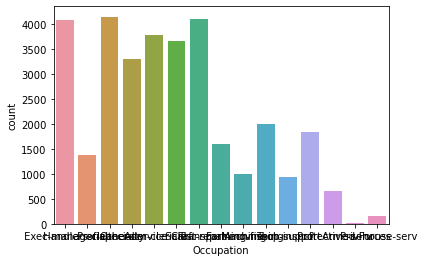

In [29]:
sns.countplot(census_proj.Occupation)

<AxesSubplot:xlabel='Relationship', ylabel='count'>

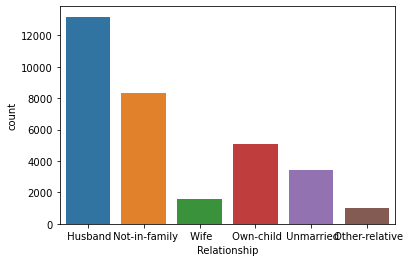

In [30]:
sns.countplot(census_proj.Relationship)

<AxesSubplot:xlabel='Race', ylabel='count'>

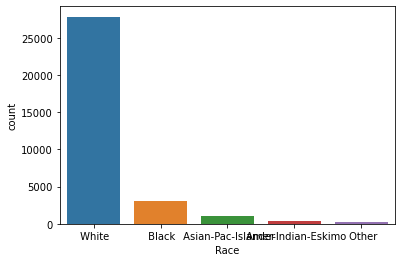

In [31]:
sns.countplot(census_proj.Race)

<AxesSubplot:xlabel='Sex', ylabel='count'>

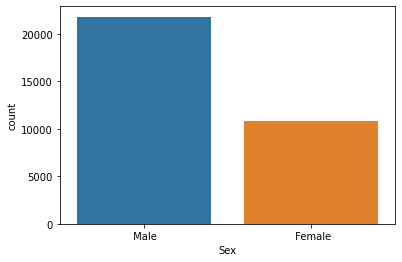

In [35]:
sns.countplot(census_proj.Sex)

<AxesSubplot:xlabel='Native_country', ylabel='count'>

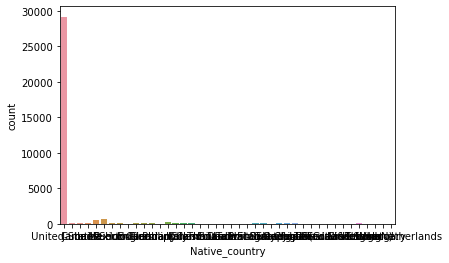

In [33]:
sns.countplot(census_proj.Native_country)

<AxesSubplot:xlabel='Income', ylabel='count'>

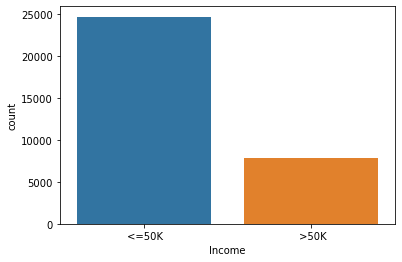

In [34]:
sns.countplot(census_proj.Income)

In [37]:
from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
for i in a_cols:
    census_proj[i] = lab.fit_transform(census_proj[i])

In [39]:
census_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [41]:
census_proj.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

In [42]:
census_proj.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


# Scatterplot ---

In [43]:
census_proj.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Income'>

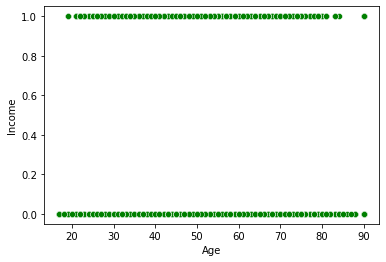

In [78]:
sns.scatterplot(x="Age", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

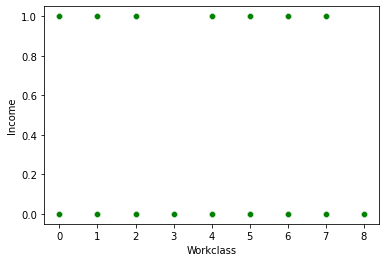

In [79]:
sns.scatterplot(x="Workclass", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Fnlwgt', ylabel='Income'>

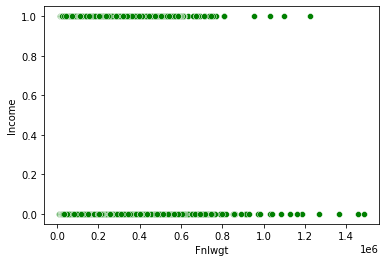

In [80]:
sns.scatterplot(x="Fnlwgt", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Education', ylabel='Income'>

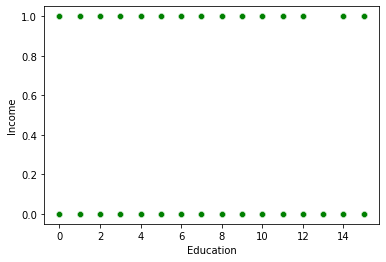

In [81]:
sns.scatterplot(x="Education", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Education_num', ylabel='Income'>

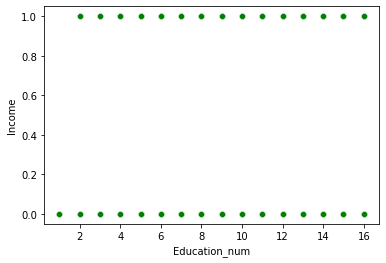

In [82]:
sns.scatterplot(x="Education_num", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

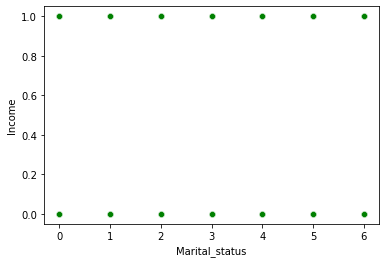

In [83]:
sns.scatterplot(x="Marital_status", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

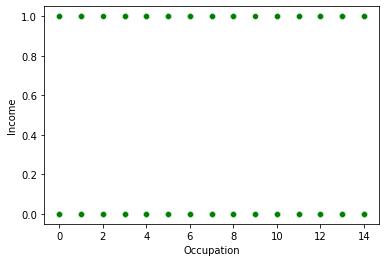

In [84]:
sns.scatterplot(x="Occupation", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

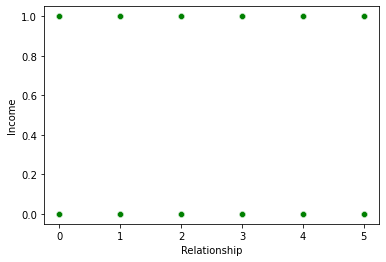

In [85]:
sns.scatterplot(x="Relationship", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Race', ylabel='Income'>

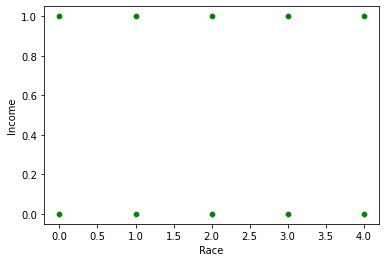

In [86]:
sns.scatterplot(x="Race", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Sex', ylabel='Income'>

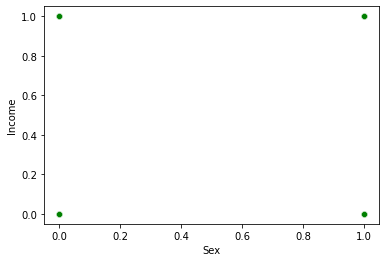

In [87]:
sns.scatterplot(x="Sex", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

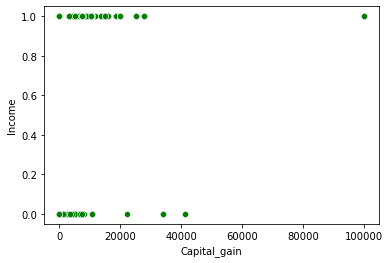

In [88]:
sns.scatterplot(x="Capital_gain", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

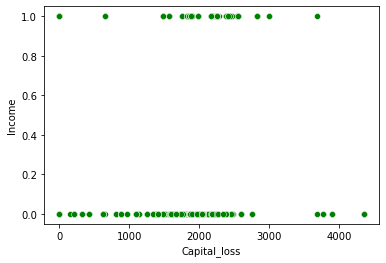

In [89]:
sns.scatterplot(x="Capital_loss", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Hours_per_week', ylabel='Income'>

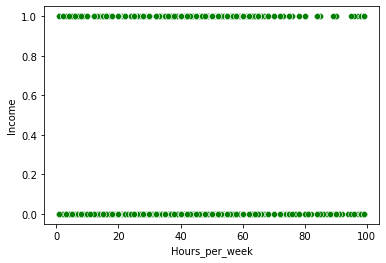

In [90]:
sns.scatterplot(x="Hours_per_week", y="Income", data=census_proj, color="green")

<AxesSubplot:xlabel='Native_country', ylabel='Income'>

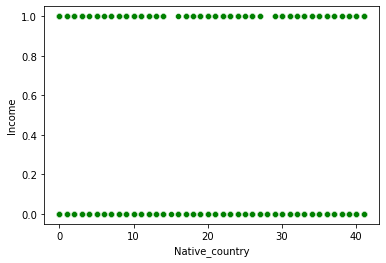

In [91]:
sns.scatterplot(x="Native_country", y="Income", data=census_proj, color="green")

# EDA

# Normal Distribution Curve ---

In [61]:
census_proj.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

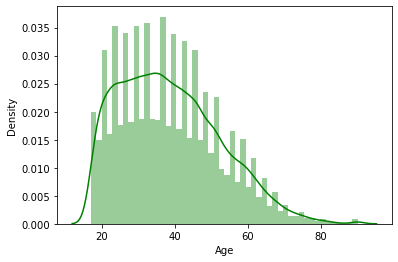

In [92]:
sns.distplot(census_proj.Age, color="green")

<AxesSubplot:xlabel='Workclass', ylabel='Density'>

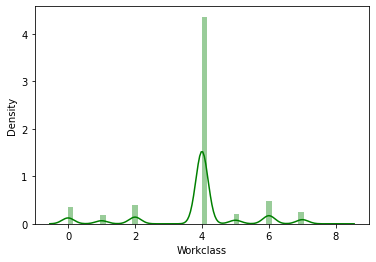

In [93]:
sns.distplot(census_proj.Workclass, color="green")

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

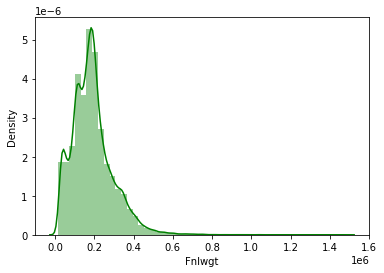

In [94]:
sns.distplot(census_proj.Fnlwgt, color="green")

<AxesSubplot:xlabel='Education', ylabel='Density'>

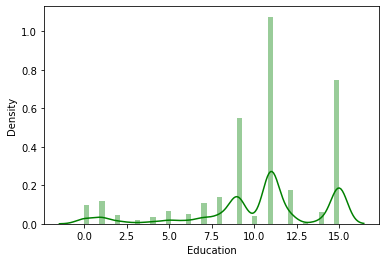

In [95]:
sns.distplot(census_proj.Education, color="green")

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

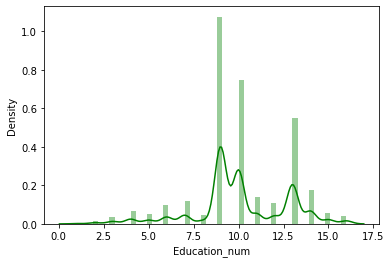

In [96]:
sns.distplot(census_proj.Education_num, color="green")

<AxesSubplot:xlabel='Marital_status', ylabel='Density'>

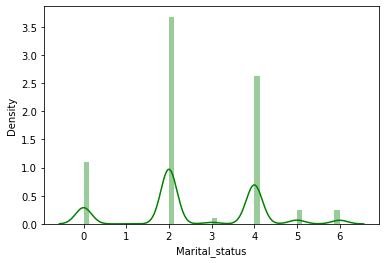

In [97]:
sns.distplot(census_proj.Marital_status, color="green")

<AxesSubplot:xlabel='Occupation', ylabel='Density'>

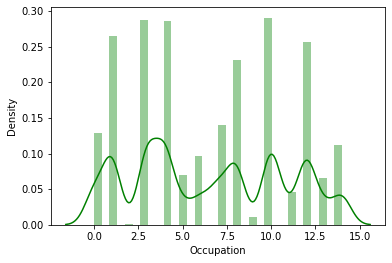

In [98]:
sns.distplot(census_proj.Occupation, color="green")

<AxesSubplot:xlabel='Relationship', ylabel='Density'>

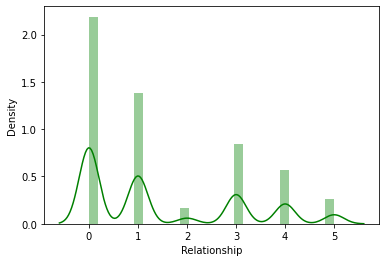

In [99]:
sns.distplot(census_proj.Relationship, color="green")

<AxesSubplot:xlabel='Race', ylabel='Density'>

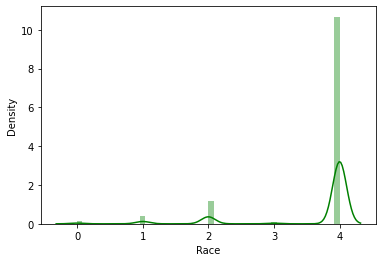

In [100]:
sns.distplot(census_proj.Race, color="green")

<AxesSubplot:xlabel='Sex', ylabel='Density'>

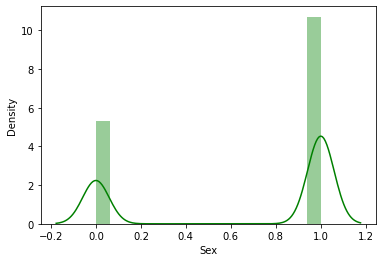

In [101]:
sns.distplot(census_proj.Sex, color="green")

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

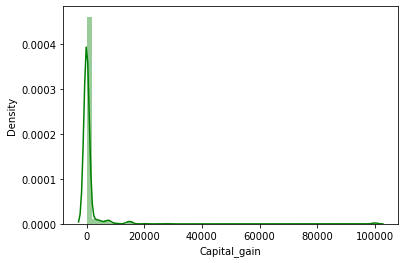

In [102]:
sns.distplot(census_proj.Capital_gain, color="green")

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

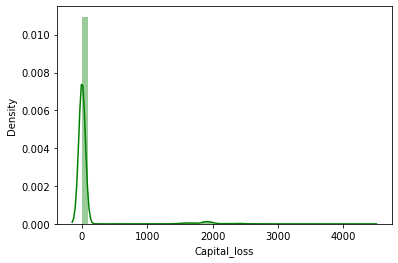

In [103]:
sns.distplot(census_proj.Capital_loss, color="green")

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

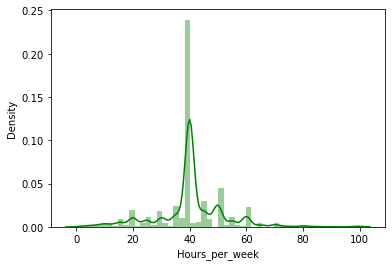

In [104]:
sns.distplot(census_proj.Hours_per_week, color="green")

<AxesSubplot:xlabel='Native_country', ylabel='Density'>

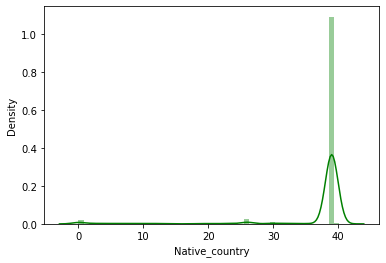

In [105]:
sns.distplot(census_proj.Native_country, color="green")

<AxesSubplot:xlabel='Income', ylabel='Density'>

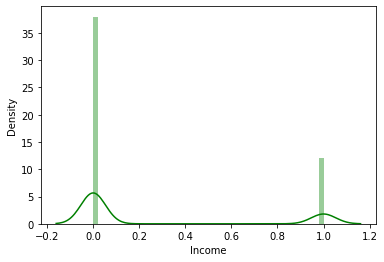

In [106]:
sns.distplot(census_proj.Income, color="green")

# Checking Outliers ---

In [77]:
census_proj.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

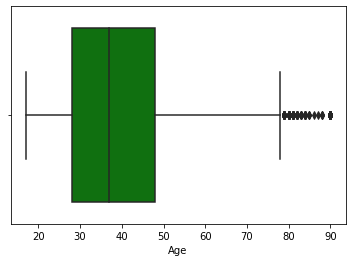

In [107]:
sns.boxplot(census_proj.Age, color="green")

<AxesSubplot:xlabel='Workclass'>

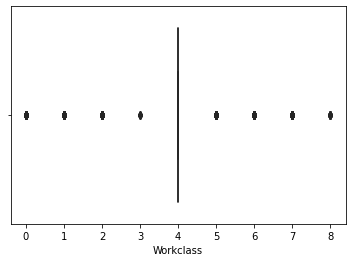

In [108]:
sns.boxplot(census_proj.Workclass, color="green")

<AxesSubplot:xlabel='Fnlwgt'>

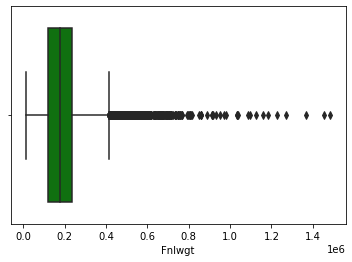

In [109]:
sns.boxplot(census_proj.Fnlwgt, color="green")

<AxesSubplot:xlabel='Education'>

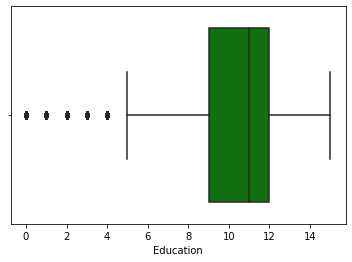

In [110]:
sns.boxplot(census_proj.Education, color="green")

<AxesSubplot:xlabel='Education_num'>

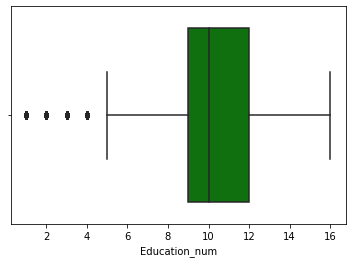

In [111]:
sns.boxplot(census_proj.Education_num, color="green")

<AxesSubplot:xlabel='Marital_status'>

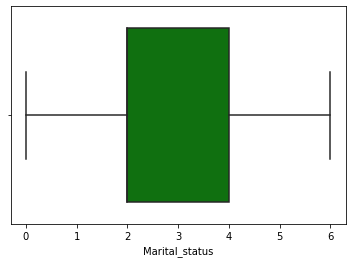

In [112]:
sns.boxplot(census_proj.Marital_status, color="green")

<AxesSubplot:xlabel='Occupation'>

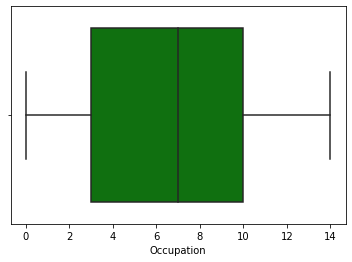

In [113]:
sns.boxplot(census_proj.Occupation, color="green")

<AxesSubplot:xlabel='Relationship'>

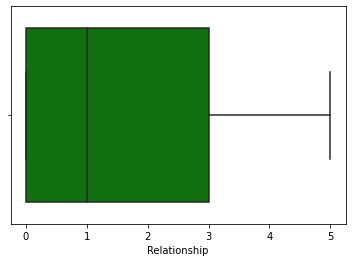

In [114]:
sns.boxplot(census_proj.Relationship, color="green")

<AxesSubplot:xlabel='Race'>

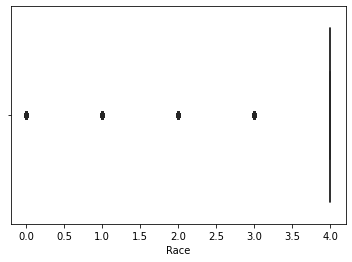

In [115]:
sns.boxplot(census_proj.Race, color="green")

<AxesSubplot:xlabel='Sex'>

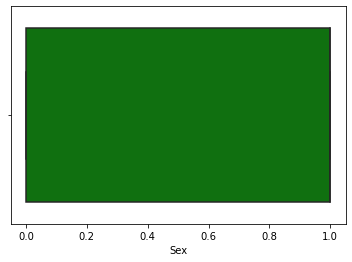

In [116]:
sns.boxplot(census_proj.Sex, color="green")

<AxesSubplot:xlabel='Capital_gain'>

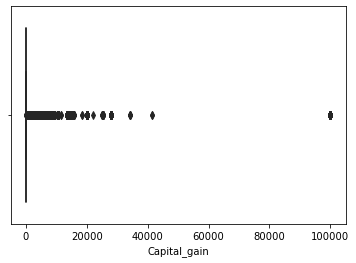

In [117]:
sns.boxplot(census_proj.Capital_gain, color="green")

<AxesSubplot:xlabel='Capital_loss'>

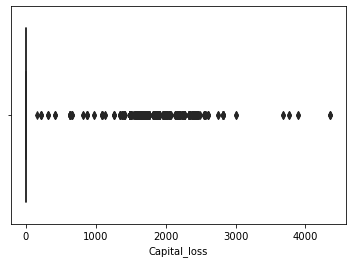

In [118]:
sns.boxplot(census_proj.Capital_loss, color="green")

<AxesSubplot:xlabel='Hours_per_week'>

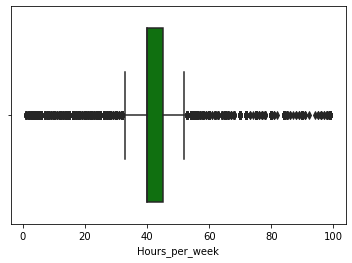

In [119]:
sns.boxplot(census_proj.Hours_per_week, color="green")

<AxesSubplot:xlabel='Native_country'>

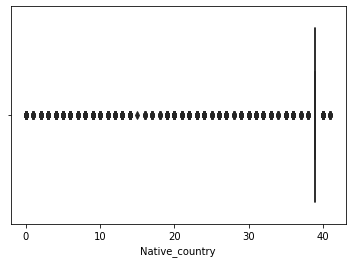

In [120]:
sns.boxplot(census_proj.Native_country, color="green")

<AxesSubplot:xlabel='Income'>

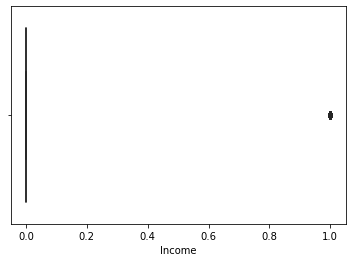

In [121]:
sns.boxplot(census_proj.Income, color="green")

From the above case, we observed that the given dataset contains a lot of outliers

In [122]:
census_proj.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

# Correlation ---

In [123]:
census_proj.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.023537,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.028156,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education,-0.010508,0.023537,-0.028156,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.064291,0.079311
Education_num,0.036527,0.052015,-0.043159,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995


Correlation using Heatmap

<AxesSubplot:>

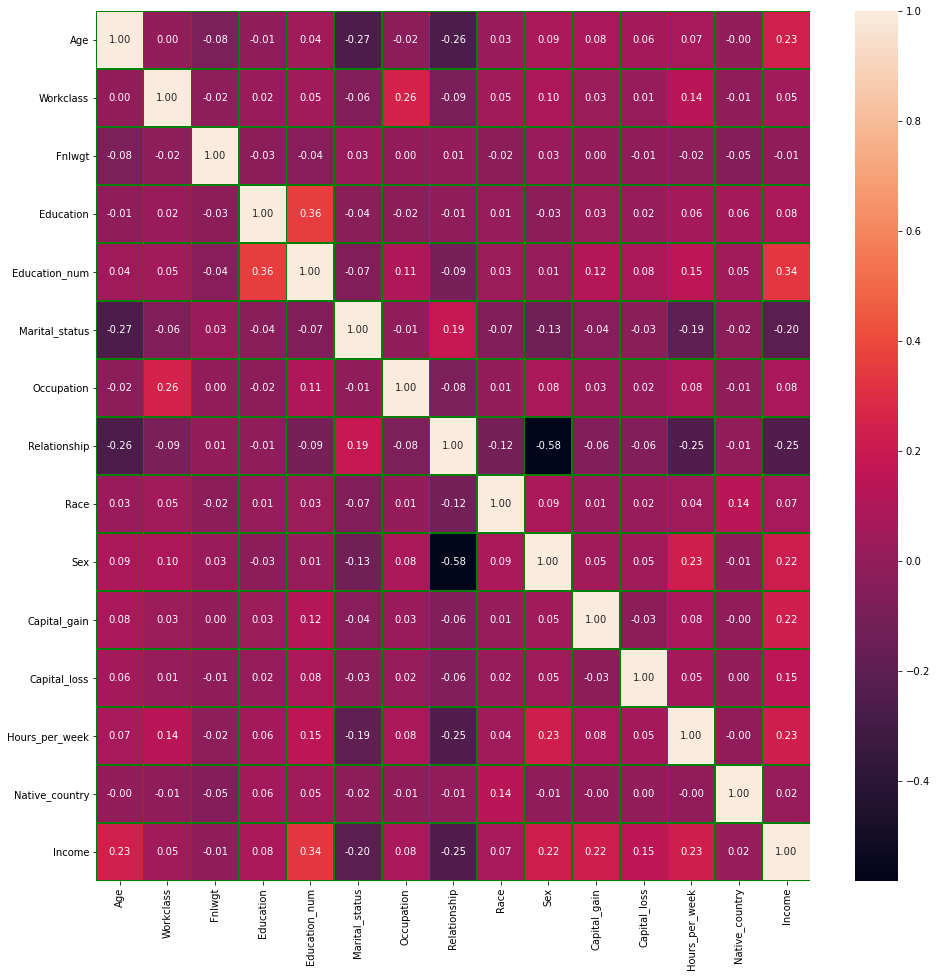

In [127]:
plt.figure(figsize=(16,16))
sns.heatmap(census_proj.corr(), annot=True, linewidth=0.5, linecolor='green', fmt='.2f')

# Checking Multicolinearity ----

In [129]:
x = census_proj.iloc[:,:-1]
y = census_proj.iloc[:,-1]

import scipy.stats as st
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as viff

def calc_vif(x1):
    vif = pd.DataFrame()
    vif["Variables"] = x1.columns
    vif["VIF Factor"] = [viff(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [130]:
calc_vif(x)

,Variables,VIF Factor
0,Age,8.521048
1,Workclass,8.476048
2,Fnlwgt,4.031761
3,Education,9.210456
4,Education_num,18.379852
5,Marital_status,3.976061
6,Occupation,3.711144
7,Relationship,2.612271
8,Race,17.577780
9,Sex,4.441515


In [131]:
pd.DataFrame([census_proj["Education"], census_proj["Education_num"]])

,0,1,2,3,4,5,6,7,8,9,...,32550,32551,32552,32553,32554,32555,32556,32557,32558,32559
Education,9,11,1,9,12,6,11,12,9,15,...,0,8,12,12,15,7,11,11,11,11
Education_num,13,9,7,13,14,5,9,14,13,10,...,6,11,14,14,10,12,9,9,9,9


In [132]:
census_proj.drop(["Education_num"], inplace=True, axis=1)

In [133]:
calc_vif(census_proj.iloc[:,:-1])

,Variables,VIF Factor
0,Age,8.358477
1,Workclass,8.451669
2,Fnlwgt,4.024788
3,Education,7.662179
4,Marital_status,3.948849
5,Occupation,3.641373
6,Relationship,2.608099
7,Race,17.284114
8,Sex,4.441247
9,Capital_gain,1.035438


From the above case, Native_country is also collinear so we will drop it from the dataset

In [134]:
census_proj.drop(["Native_country"], axis=1, inplace=True)

In [135]:
census_proj

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,83311,9,2,4,0,4,1,0,0,13,0
1,38,4,215646,11,0,6,1,4,1,0,0,40,0
2,53,4,234721,1,2,6,0,2,1,0,0,40,0
3,28,4,338409,9,2,10,5,2,0,0,0,40,0
4,37,4,284582,12,2,4,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,2,13,5,4,0,0,0,38,0
32556,40,4,154374,11,2,7,0,4,1,0,0,40,1
32557,58,4,151910,11,6,1,4,4,0,0,0,40,0
32558,22,4,201490,11,4,1,3,4,1,0,0,20,0


In [136]:
from scipy.stats import zscore

z = zscore(census_proj)

In [137]:
for i in [3,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8]:
    CP_1 = census_proj.copy()
    CP_new = census_proj[(z<i).all(axis=1)]
    loss = ((CP_1.shape[0]-CP_new.shape[0])*100)/CP_1.shape[0]
    print ("At i",i," loss % is",loss)

At i 3  loss % is 7.536855036855036
At i 3.2  loss % is 7.143734643734644
At i 3.4  loss % is 6.443488943488943
At i 3.6  loss % is 5.964373464373464
At i 3.8  loss % is 5.11056511056511
At i 4.0  loss % is 4.723587223587224
At i 4.2  loss % is 4.201474201474201
At i 4.4  loss % is 3.977272727272727
At i 4.6  loss % is 2.6535626535626538
At i 4.8  loss % is 1.554054054054054


From the above case, we will take the threshold as 3

In [138]:
census_proj = census_proj[(z<3).all(axis=1)]

In [139]:
x = census_proj.iloc[:,:-1]
y = census_proj.iloc[:,-1]

In [140]:
x.shape

(30106, 12)

Number of Rows = 30106 and Columns = 12

In [141]:
y.shape

(30106,)

Number of Rows = 30106

In [143]:
from imblearn.under_sampling import NearMiss

In [144]:
nr_miss = NearMiss()

In [145]:
x,y = nr_miss.fit_resample(x,y)

In [146]:
x.shape

(13338, 12)

Now from the above case, we have number of Rows = 13338 and Columns = 12

In [147]:
y.shape

(13338,)

Number of Rows = 13338

In [148]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer()
for i in census_proj.columns:
    if np.abs(census_proj[i].skew())>0.5:
        census_proj[i]=PT.fit_transform(census_proj[i].values.reshape(-1,1))
    elif np.abs(census_proj[i].skew())<-0.5:
        census_proj[i] = PT.fit_transform(census_proj[i].values.reshape(-1,1))

In [149]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()
x = MMS.fit_transform(x)

# Logistic Regression ---

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lg = LogisticRegression()
x_train = x
y_train = y
x_test = x
y_test = y
acc = 0
r_state = 0
for i in (0,1000):
    tr_x,t_x,tr_y,t_y=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(tr_x,tr_y)
    pred = lg.predict(t_x)
    if accuracy_score(t_y,pred)>acc:
        acc = accuracy_score(t_y,pred)
        x_train = tr_x
        x_test = t_x
        y_train = tr_y
        y_test = t_y
        r_state = i
        
print("At Random State",r_state,"Accuracy Score is Maximum i.e.",acc)

At Random State 0 Accuracy Score is Maximum i.e. 0.7203898050974513


In [152]:
def fun(f):
    f.fit(x_train,y_train)
    pred = f.predict(x_test)
    print("Accuracy Score",accuracy_score(y_test,pred))
    print("Confusion Matrix\n",confusion_matrix(y_test,pred))
    print("Classification Report\n",classification_report(y_test,pred))

In [153]:
fun(lg)

Accuracy Score 0.7203898050974513
Confusion Matrix
 [[952 342]
 [404 970]]
Classification Report
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      1294
           1       0.74      0.71      0.72      1374

    accuracy                           0.72      2668
   macro avg       0.72      0.72      0.72      2668
weighted avg       0.72      0.72      0.72      2668



# Cross Validation Score ---

In [157]:
from sklearn.model_selection import cross_val_score,KFold

def cvs(m):
    cv1 = KFold(n_splits=5,shuffle=True)
    score = cross_val_score(m,x,y,cv=cv1,scoring='accuracy')
    print("Cross Val Score",score)
    print(score.mean())

In [158]:
from sklearn.model_selection import GridSearchCV

def hypertuning(params,model):
    gd = GridSearchCV(model,params,cv=5,scoring='accuracy')
    gd.fit(x,y)
    print(gd.best_params_)

In [159]:
cvs(lg)

Cross Val Score [0.72001499 0.71926537 0.73388306 0.71878515 0.70228721]
0.718847156849022


In [160]:
CVS = [71.88]
Acc = [72.03]
Model = ["Logistic Regression"]

In [162]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gb = GaussianNB()

In [164]:
from sklearn.svm import SVC

params_svc={
    'kernel':['poly','linear','rbf','sigmoid'],'degree':[1,3],'gamma':['auto','scale'],'shrinking':[True,False]}
hypertuning(params_svc,SVC())

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True}


In [165]:
svc = SVC(degree=3,gamma='scale',kernel='poly',shrinking=True)

fun(svc)

Accuracy Score 0.7852323838080959
Confusion Matrix
 [[ 897  397]
 [ 176 1198]]
Classification Report
               precision    recall  f1-score   support

           0       0.84      0.69      0.76      1294
           1       0.75      0.87      0.81      1374

    accuracy                           0.79      2668
   macro avg       0.79      0.78      0.78      2668
weighted avg       0.79      0.79      0.78      2668



In [166]:
cvs(svc)

Cross Val Score [0.77623688 0.78823088 0.78073463 0.79827522 0.77690289]
0.7840761003075516


In [167]:
CVS.append(78.40)
Acc.append(78.52)
Model.append("SVC")

In [168]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
params_dtc = {'criterion':['gini','entropy'],'splitter':['random','best'],'max_depth':[None,1,2,3],'min_samples_split':[2,3,4]}
hypertuning(params_dtc,dtc)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'splitter': 'best'}


In [169]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,splitter='best')

fun(dtc)

Accuracy Score 0.782608695652174
Confusion Matrix
 [[ 898  396]
 [ 184 1190]]
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.69      0.76      1294
           1       0.75      0.87      0.80      1374

    accuracy                           0.78      2668
   macro avg       0.79      0.78      0.78      2668
weighted avg       0.79      0.78      0.78      2668



In [170]:
cvs(dtc)

Cross Val Score [0.76986507 0.77923538 0.78635682 0.78665167 0.78965129]
0.7823520466988103


In [171]:
CVS.append(78.23)
Acc.append(78.26)
Model.append("Decision Tree Classifier")

In [174]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
params_knc = {'n_neighbors':[5,7,9,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50]}
hypertuning(params_knc,knc)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}


In [175]:
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=11,weights='uniform')

fun(knc)

Accuracy Score 0.7792353823088456
Confusion Matrix
 [[1013  281]
 [ 308 1066]]
Classification Report
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1294
           1       0.79      0.78      0.78      1374

    accuracy                           0.78      2668
   macro avg       0.78      0.78      0.78      2668
weighted avg       0.78      0.78      0.78      2668



In [176]:
cvs(knc)

Cross Val Score [0.78935532 0.78635682 0.78635682 0.76940382 0.79377578]
0.7850497136133845


In [199]:
CVS.append(78.50)
Acc.append(77.92)
Model.append("K Neighbors Classifier")

In [181]:
fun(gb)

Accuracy Score 0.5989505247376312
Confusion Matrix
 [[1294    0]
 [1070  304]]
Classification Report
               precision    recall  f1-score   support

           0       0.55      1.00      0.71      1294
           1       1.00      0.22      0.36      1374

    accuracy                           0.60      2668
   macro avg       0.77      0.61      0.53      2668
weighted avg       0.78      0.60      0.53      2668



In [182]:
cvs(gb)

Cross Val Score [0.60007496 0.59745127 0.60494753 0.62204724 0.61154856]
0.607213912728675


In [183]:
CVS.append(60.72)
Acc.append(59.89)
Model.append("Gaussian NB Classifier")

# Ensemble Method ---

In [184]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators':[10,20,30,50],
           'criterion':['gini', 'entropy'],
           'max_depth':[None,1,2,3],
           'min_samples_split':[2,3,4]}
hypertuning(params_rf,rf)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 50}


In [185]:
rf = RandomForestClassifier(criterion='gini',max_depth=None,min_samples_split=3,n_estimators=30)

fun(rf)

Accuracy Score 0.8065967016491754
Confusion Matrix
 [[1044  250]
 [ 266 1108]]
Classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.80      1294
           1       0.82      0.81      0.81      1374

    accuracy                           0.81      2668
   macro avg       0.81      0.81      0.81      2668
weighted avg       0.81      0.81      0.81      2668



In [186]:
cvs(rf)

Cross Val Score [0.82458771 0.80097451 0.7976012  0.8023997  0.81327334]
0.8077672918321491


In [187]:
CVS.append(80.77)
Acc.append(80.65)
Model.append("Random Forest Classifier")

In [188]:
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier()
params_ext = {'criterion':['gini','entropy'],
            'splitter':['random','best'],
            'max_depth':[None,1,2,3],
            'min_samples_split':[2,3,4]}
hypertuning(params_ext,ext)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 4, 'splitter': 'best'}


In [189]:
ext = ExtraTreeClassifier(criterion='entropy',max_depth=None,min_samples_split=4,splitter='best')

fun(ext)

Accuracy Score 0.7563718140929535
Confusion Matrix
 [[1005  289]
 [ 361 1013]]
Classification Report
               precision    recall  f1-score   support

           0       0.74      0.78      0.76      1294
           1       0.78      0.74      0.76      1374

    accuracy                           0.76      2668
   macro avg       0.76      0.76      0.76      2668
weighted avg       0.76      0.76      0.76      2668



In [190]:
cvs(ext)

Cross Val Score [0.75337331 0.74550225 0.75749625 0.75065617 0.74990626]
0.7513868487578483


In [191]:
CVS.append(75.13)
Acc.append(75.63)
Model.append("Extra Tree Classifier")

In [192]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
params_ada = {'n_estimators':[10,20,30,50],'learning_rate':[1,0.9,0.8],'algorithm':['SAMME', 'SAMME.R'],'random_state':[43,33,56]}
hypertuning(params_ada,ada)

{'algorithm': 'SAMME.R', 'learning_rate': 0.8, 'n_estimators': 50, 'random_state': 43}


In [193]:
ada = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50,random_state=43)

fun(ada)

Accuracy Score 0.8193403298350824
Confusion Matrix
 [[1055  239]
 [ 243 1131]]
Classification Report
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1294
           1       0.83      0.82      0.82      1374

    accuracy                           0.82      2668
   macro avg       0.82      0.82      0.82      2668
weighted avg       0.82      0.82      0.82      2668



In [194]:
cvs(ada)

Cross Val Score [0.82121439 0.81934033 0.81634183 0.81214848 0.81477315]
0.8167636373039577


In [195]:
CVS.append(81.67)
Acc.append(81.93)
Model.append("Ada Boost Classifier")

In [200]:
output = pd.DataFrame()
output["Models"] = Model
output["CVS"] = CVS
output["Accuracy"] = Acc
diff = []

for i in range(0,len(Acc)):
    diff.append(Acc[i]-CVS[i])
output["Diff."]=diff
output.index+=1

In [201]:
output

,Models,CVS,Accuracy,Diff.
1,Logistic Regression,71.88,72.03,0.15
2,SVC,78.40,78.52,0.12
3,Decision Tree Classifier,78.23,78.26,0.03
4,K Neighbors,78.50,77.92,-0.58
5,K Neighbors Classifier,78.50,77.92,-0.58
6,Gaussian NB Classifier,60.72,59.89,-0.83
7,Random Forest Classifier,80.77,80.65,-0.12
8,Extra Tree Classifier,75.13,75.63,0.50
9,Ada Boost Classifier,81.67,81.93,0.26
10,K Neighbors Classifier,78.50,77.92,-0.58


From the above case, the best model is Ada Boost Classifier because it's CVS and accuracy is the highest

# Model Saving ---

In [202]:
import pickle

filename = 'Income_Project.pkl'
pickle.dump(ada,open(filename,'wb'))

In [203]:
predict = ada.predict(x_test)

In [204]:
output_ada = pd.DataFrame()
output_ada["Actual"] = y_test
output_ada["Predicted"] = predict

In [205]:
output_ada

,Actual,Predicted
12069,1,1
1595,0,0
12961,1,1
6856,1,1
8394,1,1
...,...,...
2217,0,0
8174,1,1
1126,0,0
2033,0,0


In [211]:
# Let's save the dataframe in csv file

In [206]:
output.to_csv('Income_Project.csv')

In [212]:
# The Accuracy score in the case ADA Boost Classifier is the highest i.e. 81.93%

# AUC ROC CURVE ---

In [207]:
from sklearn.metrics import roc_curve,roc_auc_score

In [208]:
y_pred_prob = ada.predict_proba(x_test)[:,1]

In [209]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

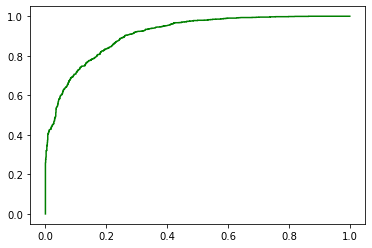

In [210]:
plt.plot(fpr,tpr, color="green")
plt.show()